<h2 id="Feature engineering">Feature engineering</h2>

Looking deeper into some relevant variables

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
training=pd.read_csv('clean_training.csv')
test=pd.read_csv('clean_test.csv')

In [67]:
training.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'casual', 'registered', 'cnt'],
      dtype='object')

In [68]:
train=training.copy()

In [70]:
#We'll concact the two data sets so that feature engineering is done for both.
train.drop(columns=['casual','registered','cnt'], inplace=True)

train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train,test])

In [71]:
test.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'train_test'],
      dtype='object')

In [72]:
all_data.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
train_test      int64
dtype: object

In [36]:
all_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,train_test
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,1


The feature banning will be done in the variables with float data type and in variable hr, since it has 24 classes and the idea is to simplify the problem.

the function qcut discretize variable into equal-sized buckets based on sample quantiles, while cat.codes assing a number code. Since there is no way to start the encoding with 1 instead of 0 (zero), a map function is applied so the model does not to have to handle zeros.

In [73]:
#Defining a function
def binning(df,column,column_bin):
    df['bin'] = pd.qcut(df[column], q=4)
    df[column_bin] = df['bin'].cat.codes
    df[column_bin] = df[column_bin].map({0:1,1:2,2:3,3:4})
    df.drop(columns='bin', inplace=True)
    return df

In [80]:
all_data=binning(all_data,'hr','hr_')
all_data=binning(all_data,'temp','temp_')
all_data=binning(all_data,'hum','hum_')
all_data.head(1)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,train_test,hr_,temp_,hum_
0,1,1,0,0,6,0,1,0.24,0.81,1,1,1,4


In [6]:
# feature['hr_bin'] = pd.cut(feature['hr'], [0,6, 13, 18,23],include_lowest=True)
# feature['hr_'] = feature['hr_bin'].cat.codes
# feature['hr_'] = feature['hr_'].map({0:1,1:2,2:3,3:4})
# # feature.drop(columns='hr_bin', inplace=True)

# feature.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_bin,hr_
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,"(-0.001, 6.0]",1


In [90]:
# #spliting the data again and adding the casual/registered and cnt columns
train = all_data[all_data.train_test == 1].drop(['train_test'], axis =1)
test = all_data[all_data.train_test == 0].drop(['train_test'], axis =1)
train['casual']=training[['casual']]
train['registered']=training[['registered']]
train['cnt']=training[['cnt']]
train.head(1)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,hr_,temp_,hum_,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.81,1,1,4,3,13,16


<AxesSubplot:xlabel='temp', ylabel='cnt'>

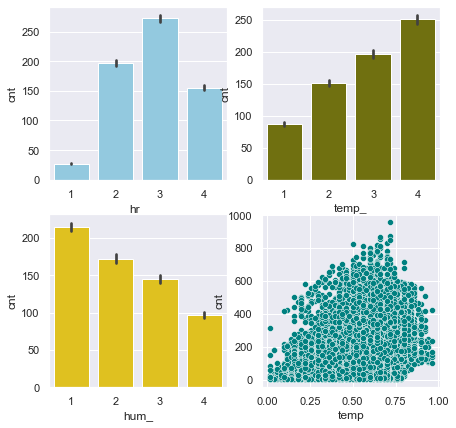

In [102]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.barplot(data=train, x="hr_", y="cnt",color="skyblue", ax=axs[0, 0])
sns.barplot(data=train, x="temp_",y="cnt", color="olive", ax=axs[0, 1])
sns.barplot(data=train, x="hum_",y="cnt", color="gold", ax=axs[1, 0])
sns.scatterplot(data=train, x="temp",y="cnt", color="teal", ax=axs[1, 1]) #this figure try to show the simplification of the problem with temp as example


<h3> Feature file for ML<h3>

In [103]:
train.to_csv('feature_training.csv',index=False)
test.to_csv('feature_test.csv',index=False)